In [18]:
import pandas as pd 
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
df = pd.read_csv("../full_dataset_main_20tickers.csv",encoding='utf-8') #need the encoding to correctly display emojis
df = df.drop(columns=['num_comments', 'selftext', 'score', 'oldid', 'author', 'fulltext_processed'])

In [5]:
df

,newid,id,title,Time of Creation,new_id,fulltext,ticker
0,1,ac1ox8,Sneak peek - Tomorrow's follow-up $AAPL announ...,1/2/2019 21:00,t3_ac1ox8,Sneak peek - Tomorrow's follow-up $AAPL announ...,AAPL
1,2,ac05lf,$AAPL &amp; Cook taking us home!,1/2/2019 18:12,t3_ac05lf,$AAPL &amp; Cook taking us home!,AAPL
2,3,abwjpx,AAPL DD,1/2/2019 12:13,t3_abwjpx,AAPL DD I live in a major U.S City and I attem...,AAPL
3,4,abth0l,TSLA MISSES PRODUCTION NUMBERS,1/2/2019 6:37,t3_abth0l,TSLA MISSES PRODUCTION NUMBERS,TSLA
4,5,abt60l,AMD Leaks: Ryzen 3 3800X (16 cores at 4.7Ghz C...,1/2/2019 5:56,t3_abt60l,AMD Leaks: Ryzen 3 3800X (16 cores at 4.7Ghz C...,AMD
...,...,...,...,...,...,...,...
17781,17782,yt80ho,"Bought $946,646 GME and AMC Update: Gain +$111...",11/12/2022 7:07,t3_yt80ho,"Bought $946,646 GME and AMC Update: Gain +$111...",GME
17782,17783,yt7uzu,GME reversal or nah?,11/12/2022 7:01,t3_yt7uzu,GME reversal or nah? GME holding its floor pri...,GME
17783,17784,yuetk8,Puts in TSLA? Tesla loses control injuring 7 a...,11/13/2022 14:25,t3_yuetk8,Puts in TSLA? Tesla loses control injuring 7 a...,TSLA
17784,17785,yviv2x,200K $AMC Calls! Going to add following the me...,11/14/2022 18:25,t3_yviv2x,200K $AMC Calls! Going to add following the me...,AMC


In [147]:
print("Original Text: " + full_text)

after_processing = preprocessText(full_text)
print("\nAfter Processing: " + after_processing)

Original Text: -25% on GME

After Processing: minussign numberplaceholder percentsign gme


In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ardit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ardit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ardit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ardit\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
import string
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
additional_stopwords = ['http', 'amp', 'https']

for word in additional_stopwords:
    stopwords.add(word)

tickers = ['aapl', 'tsla', 'amd', 'msft', 'tlry', 'amzn', 'bb', 'nio', 'gme', 'bbby',
           'nok', 'spce', 'amc', 'rkt', 'crsr', 'pltr', 'clov', 'wish', 'uwmc', 'clne']

from nltk.tokenize import word_tokenize
from emoji import is_emoji
from emoji import demojize

In [8]:
# Based on Dr. Uddin's A1 Solution
regex = re.compile('[^a-zA-Z]')

# Use regex to remove non-alpha characters
def removeNonAlpha(word):
    return regex.sub('', word)
 
# Remove any special characters
def remove_specialchars(word):
    if word is None or word == "":
        return word
    exclude = set(string.punctuation)    
    exclude.add('..')
    exclude.add('*')
    for c in exclude:
        word = word.strip(c)
    return word

def preprocessText(text_input):
    
    # Replace emojis in string with words
    text_input = demojize(text_input, delimiters=(" ", "emoji "))
    
    # Replace other symbols
    text_input = text_input.replace('+', ' plussign ')
    text_input = text_input.replace('-', ' minussign ')
    text_input = text_input.replace('%', ' percentsign ')
    text_input = text_input.replace('$', ' dollarsign ')
    
    words = []
                   
    # Tokenize into sentences, then into words
    sents = nltk.sent_tokenize(text_input)
    for sent in sents:
        for word in nltk.word_tokenize(sent):
            
            word = word.lower()
            
            # Remove stop words, specials chars, non-alpha
            word = remove_specialchars(word)
            
            try:
                float(word.replace(',' , ""))
                word = "numberplaceholder"
            except:
                pass
                
            word = removeNonAlpha(word)
            
            if word in stopwords: continue
            
            # Remove words with length shorter than 3 characters
            if len(word) < 3 and word not in tickers: continue
                          
            # Lemmatize the word
            word = WordNetLemmatizer().lemmatize(word)
            
            if word is not None:
                words.append(word)
                
        
    # Return the preprocessed text
    return " ".join(words)

In [9]:
df['processed_text'] = df['fulltext'].apply(preprocessText)
df

,newid,id,title,Time of Creation,new_id,fulltext,ticker,processed_text
0,1,ac1ox8,Sneak peek - Tomorrow's follow-up $AAPL announ...,1/2/2019 21:00,t3_ac1ox8,Sneak peek - Tomorrow's follow-up $AAPL announ...,AAPL,sneak peek minussign tomorrow follow minussign...
1,2,ac05lf,$AAPL &amp; Cook taking us home!,1/2/2019 18:12,t3_ac05lf,$AAPL &amp; Cook taking us home!,AAPL,dollarsign aapl cook taking home
2,3,abwjpx,AAPL DD,1/2/2019 12:13,t3_abwjpx,AAPL DD I live in a major U.S City and I attem...,AAPL,aapl live major city attempted buy apple airpo...
3,4,abth0l,TSLA MISSES PRODUCTION NUMBERS,1/2/2019 6:37,t3_abth0l,TSLA MISSES PRODUCTION NUMBERS,TSLA,tsla miss production number
4,5,abt60l,AMD Leaks: Ryzen 3 3800X (16 cores at 4.7Ghz C...,1/2/2019 5:56,t3_abt60l,AMD Leaks: Ryzen 3 3800X (16 cores at 4.7Ghz C...,AMD,amd leak ryzen numberplaceholder numberplaceho...
...,...,...,...,...,...,...,...,...
17781,17782,yt80ho,"Bought $946,646 GME and AMC Update: Gain +$111...",11/12/2022 7:07,t3_yt80ho,"Bought $946,646 GME and AMC Update: Gain +$111...",GME,bought dollarsign numberplaceholder gme amc up...
17782,17783,yt7uzu,GME reversal or nah?,11/12/2022 7:01,t3_yt7uzu,GME reversal or nah? GME holding its floor pri...,GME,gme reversal nah gme holding floor price appro...
17783,17784,yuetk8,Puts in TSLA? Tesla loses control injuring 7 a...,11/13/2022 14:25,t3_yuetk8,Puts in TSLA? Tesla loses control injuring 7 a...,TSLA,put tsla tesla loses control injuring numberpl...
17784,17785,yviv2x,200K $AMC Calls! Going to add following the me...,11/14/2022 18:25,t3_yviv2x,200K $AMC Calls! Going to add following the me...,AMC,dollarsign amc call going add following meme s...


In [16]:
word_freq = pd.DataFrame(df.processed_text.str.split(expand=True).stack().value_counts(), columns=['Mentions'])
word_freq[:20]

,Mentions
numberplaceholder,63364
minussign,57570
dollarsign,27578
rocketemoji,21704
gme,16588
percentsign,12987
share,12977
stock,11291
short,10793
price,8372


In [50]:
df_dateticker = df[['Time of Creation', 'ticker']]
df_dateticker['Time of Creation'] = pd.to_datetime(df_dateticker['Time of Creation'])
df_dateticker['Time of Creation'] = df_dateticker['Time of Creation'].dt.normalize()

C:\Users\Ardit\AppData\Local\Temp\ipykernel_30972\2189014319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dateticker['Time of Creation'] = pd.to_datetime(df_dateticker['Time of Creation'])
C:\Users\Ardit\AppData\Local\Temp\ipykernel_30972\2189014319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dateticker['Time of Creation'] = df_dateticker['Time of Creation'].dt.normalize()


In [107]:
def posts_vs_stock_graph(ticker):
    date_df = pd.DataFrame(pd.date_range(start = '2019-01-01', end = '2022-11-14'), columns = ['Date'])
    
    ticker_df = df_dateticker[df_dateticker['ticker']==ticker].groupby("Time of Creation").count()
    ticker_df = date_df.merge(ticker_df, left_on = 'Date', right_on = 'Time of Creation', how = 'outer').fillna(0)
    
    # Get the stock price
    start_date = '2019-01-01'
    end_date = '2022-11-14'
    df_stockprice = yf.download(ticker, start_date, end_date)
    
    
    ticker_df = ticker_df.merge(df_stockprice['Close'], left_on = 'Date', right_index = True, how = 'outer')
    
    ticker_df = ticker_df.fillna(method = 'ffill')
    ticker_df = ticker_df.fillna(method = 'bfill')
    
    ticker_df['year_month'] = pd.to_datetime(ticker_df['Date']).dt.to_period('M')
    ticker_df = ticker_df.groupby('year_month').agg({'ticker':'sum', 'Close': 'mean'}).reset_index()
    
    ticker_df = ticker_df.rename(columns={"year_month": "Date", "ticker": "Posts", "Close": "Stock Price"})
    
    # creating axes object and defining plot
    ax1 = ticker_df.plot(x = 'Date',
                      y = 'Posts')

    ax2 = ticker_df.plot(x = 'Date',
                       y = "Stock Price", secondary_y = True,
                       ax = ax1,
                        mark_right = False)

    #title of the plot
    plt.title("WSB Posts vs. Stock Price for " + ticker)

    #labeling x and y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Number of Posts per Month')
    ax2.set_ylabel('Stock Price (USD)')

    #defining display layout
    plt.tight_layout()

    #show plot
    plt.show()

[*********************100%***********************]  1 of 1 completed


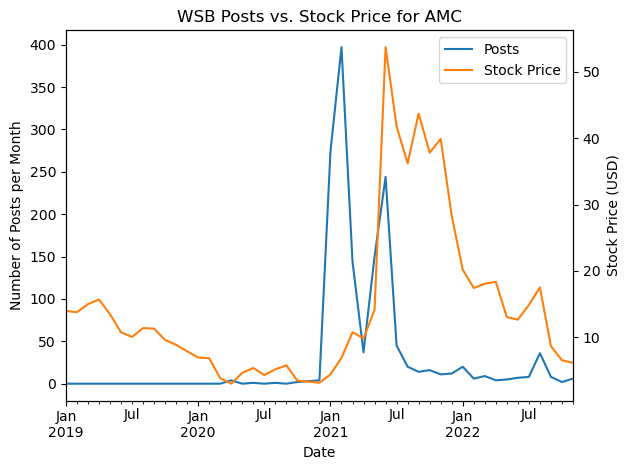

[*********************100%***********************]  1 of 1 completed


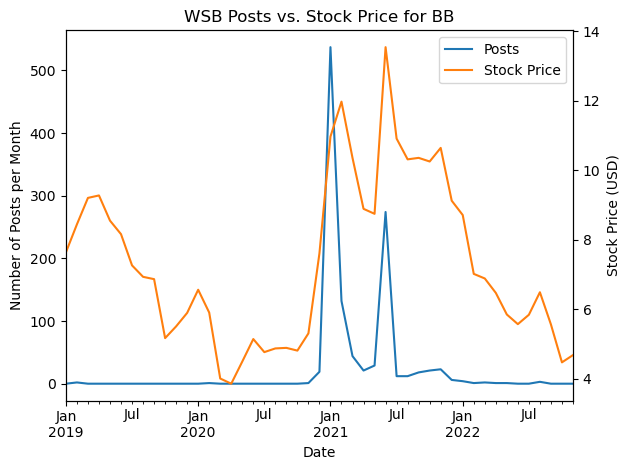

[*********************100%***********************]  1 of 1 completed


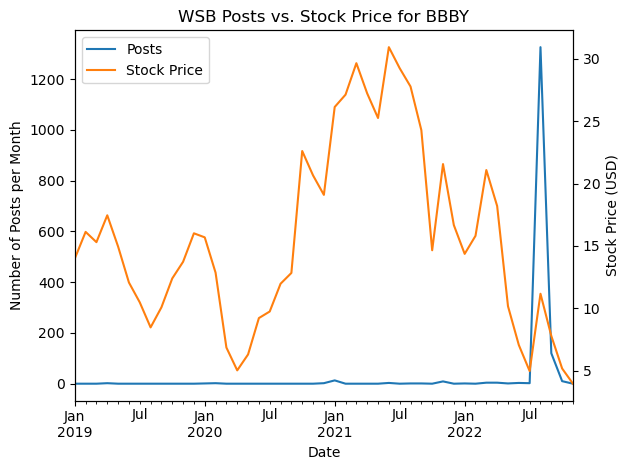

[*********************100%***********************]  1 of 1 completed


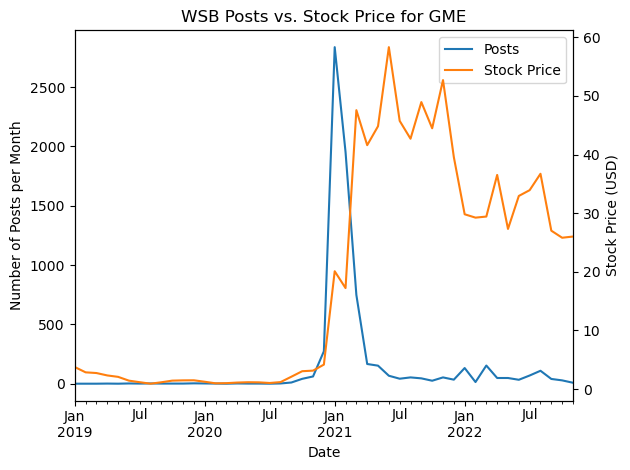

[*********************100%***********************]  1 of 1 completed


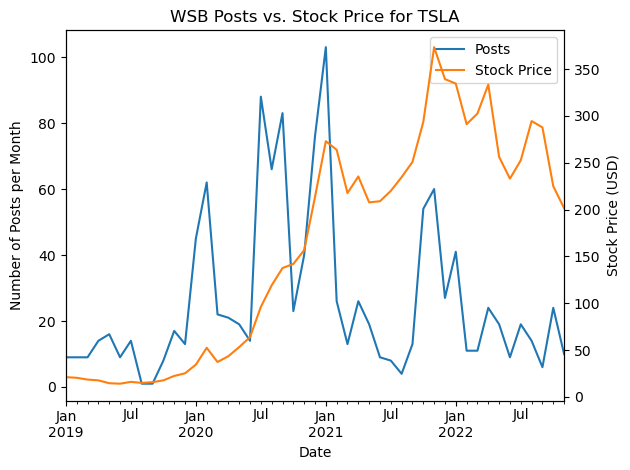

In [116]:
top5 = ['AMC', 'BB', 'BBBY', 'GME', 'TSLA']
for ticker in top5:
    posts_vs_stock_graph(ticker)

## Visualization based on the top 5 tickers

In [459]:
from collections import Counter
top_5 = Counter(" ".join(df["ticker"]).split()).most_common(5)
top_5_list = []
for i in range(len(top_5)):
    top_5_list.append(top_5[i][0])
    
#get top 5 tickers
print(top_5_list)

['GME', 'BBBY', 'AMC', 'TSLA', 'BB']


In [460]:
df2 = df[["Time of Creation" , "ticker"]]
#get top 5 ticker rows for dataframe
df2_top_5 = df2[df2.ticker.isin(top_5_list)]

In [461]:
df2_top_5['year_month'] = pd.to_datetime(df['Time of Creation']).dt.to_period('M')
df2_top_5 = df2_top_5.drop(["Time of Creation"], axis = 1)

/var/folders/gg/j9k_n1253cn__3qb4ymvx31r0000gn/T/ipykernel_41009/2523948770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_top_5['year_month'] = pd.to_datetime(df['Time of Creation']).dt.to_period('M')


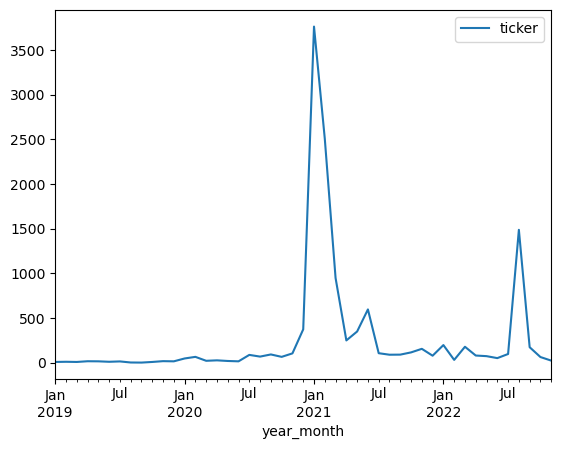

In [462]:
# Mentioning based on Month
top_ticker_mentions_by_month = df2_top_5.groupby("year_month")['ticker'].count().plot(legend = True)

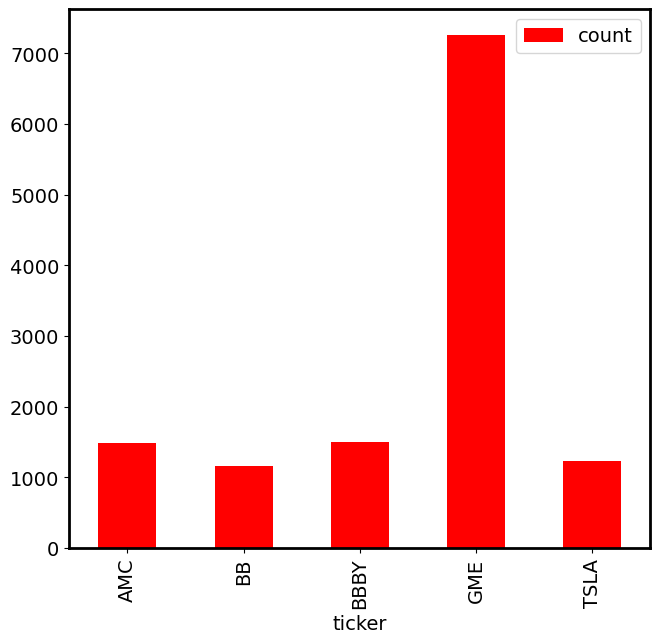

In [624]:
top_tickers_period_by_month = df2_top_5.groupby(df2_top_5["year_month"]).value_counts(ascending = True)

pd.plotting.register_matplotlib_converters()
# plotting top 5 
top_tickers_period_by_month = top_tickers_period_by_month.reset_index()
top_tickers_period_by_month.columns = ['date', 'ticker', 'count']

top_tickers_period_by_month_bar = top_tickers_period_by_month.groupby(top_tickers_period_by_month["ticker"]).sum().plot(kind = 'bar' , color = 'red')

In [683]:
total_months = top_tickers_period_by_month["date"].max() - top_tickers_period_by_month["date"].min()
top_tickers_period_by_month_pivot = top_tickers_period_by_month.pivot(index="ticker", columns= "date" , values = "count")
top_tickers_period_by_month_pivot = top_tickers_period_by_month_pivot.fillna(0)
top_tickers_period_by_month_pivot

date,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11
ticker,,,,,,,,,,,,,,,,,,,,,
AMC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,9.0,4.0,5.0,7.0,8.0,36.0,8.0,2.0,6.0
BB,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0
BBBY,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,1.0,3.0,2.0,1326.0,120.0,10.0,0.0
GME,0.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,1.0,...,14.0,153.0,48.0,48.0,33.0,69.0,109.0,40.0,28.0,8.0
TSLA,9.0,9.0,9.0,14.0,16.0,9.0,14.0,1.0,1.0,8.0,...,11.0,11.0,24.0,19.0,9.0,19.0,14.0,6.0,24.0,10.0


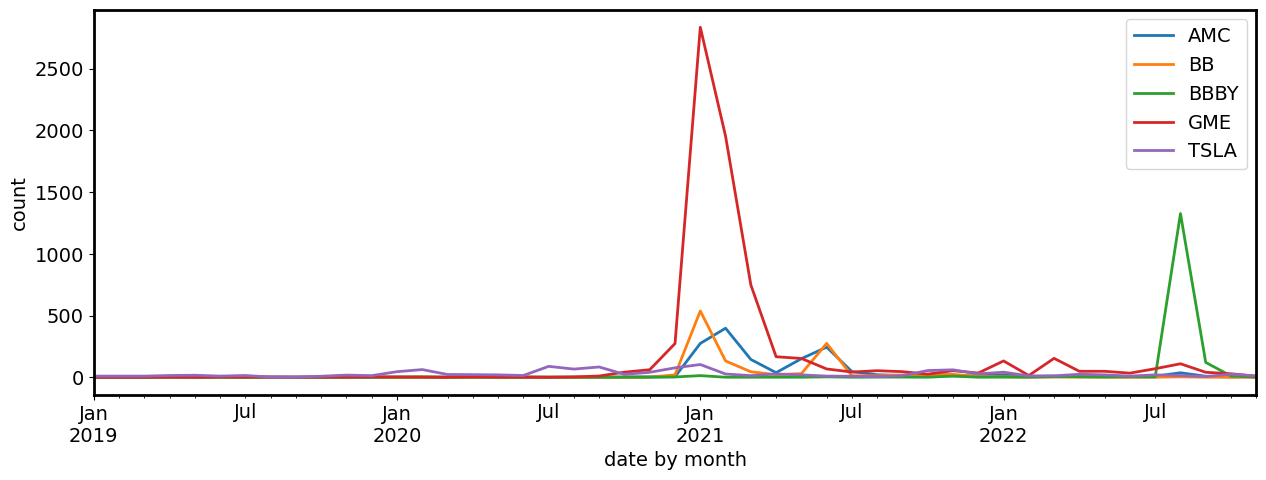

In [688]:
for i in range(len(top_5_list)):
    line = top_tickers_period_by_month_pivot.iloc[i]
    line.plot(figsize = [15,5], legend = True)
plt.xlabel("date by month")
plt.ylabel("count")
plt.show()

In [689]:
#get one for year alone
df3 = df[["Time of Creation" , "ticker"]]
df3_top_5 = df3[df3.ticker.isin(top_5_list)]
df3_top_5['year'] = pd.to_datetime(df3_top_5['Time of Creation']).dt.year
df3_top_5 = df3_top_5.drop(["Time of Creation"], axis = 1)

/var/folders/gg/j9k_n1253cn__3qb4ymvx31r0000gn/T/ipykernel_41009/1659684636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_top_5['year'] = pd.to_datetime(df3_top_5['Time of Creation']).dt.year


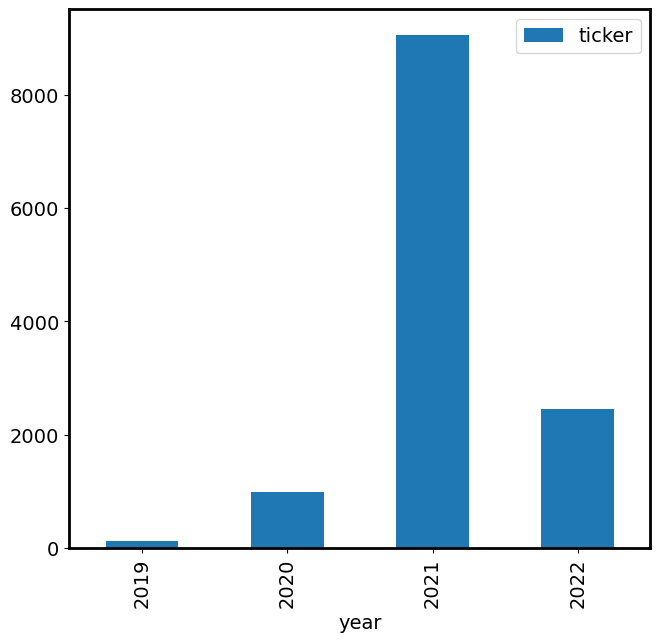

In [690]:
ticker_mentions_by_year = df3_top_5.groupby(df3_top_5["year"]).count()
ticker_mentions_by_year.plot(kind = "bar")
top_tickers_period_by_year = df3_top_5.groupby(df3_top_5["year"]).value_counts()

In [691]:
ticker_mentions_by_year = top_tickers_period_by_year.reset_index()
ticker_mentions_by_year.columns = ['date', 'ticker', 'count']

In [692]:
top_tickers_period_by_year_pivot = ticker_mentions_by_year.pivot(index="ticker", columns= "date", values = "count")
top_tickers_period_by_year_pivot = top_tickers_period_by_year_pivot.fillna(0)
top_tickers_period_by_year_pivot

date,2019,2020,2021,2022
ticker,,,,
AMC,0.0,15.0,1364.0,111.0
BB,2.0,21.0,1129.0,12.0
BBBY,2.0,5.0,27.0,1471.0
GME,12.0,394.0,6174.0,682.0
TSLA,120.0,559.0,362.0,188.0


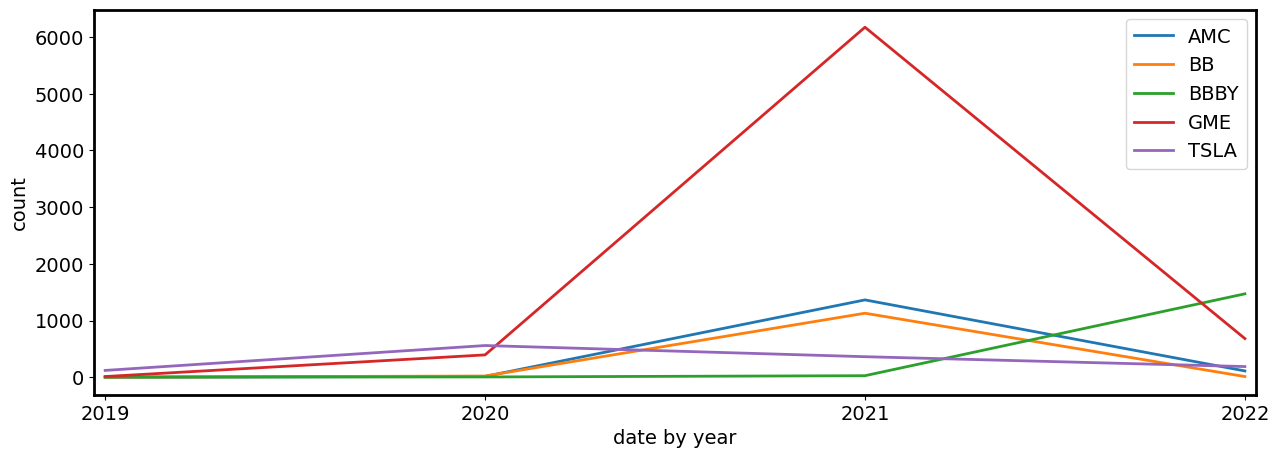

In [693]:
for i in range(len(top_5_list)):
    line = top_tickers_period_by_year_pivot.iloc[i]
    line.plot(xticks =top_tickers_period_by_year_pivot.columns,  figsize = [15,5], legend = True)
plt.xlabel("date by year")
plt.ylabel("count")
plt.show()